# Plotting and analyzing the nuclides Isobars for 82 Atomic Mass
## Assignment on Nuclear and Subnuclear Physics course
Author:
Andrea Morales Rodríguez

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

In [3]:
f = open('Tarea1FNS-A82.csv', 'r')
list1, list2, list3, list4, list5 = zip(*[x.split(';') for x in f.readlines()])
Elementos = list1

Z = list2
Z1=[28,29,30,31,32,33,34,35,36,37,38,39,40,41,42]
N = list3
N1=[54,53,52,51,50,49,48,47,46,45,44,43,42,41,40]
Exceso = list4
E = [-10.72,-25.73,-42.314,-52.93,-65.41,-70.10,-77.593,-77.498,-80.591,-76.188,-76.010,-68.064,-63.614,-51.81,-40.37]
Incert = list5
I = [0.8,0.4,0.003,0.0024,0.0022,0.004,0.0005,0.001,0.00006,0.003,0.006,0.005,0.0016,0.3,0.4]
print(Incert)

('0.8\n', '0.4\n', '0.003\n', '0.0024\n', '0.0022\n', '0.004\n', '0.0005\n', '0.001\n', '0.00006\n', '0.003\n', '0.006\n', '0.005\n', '0.0016\n', '0.3\n', '0.4')


## Plotting Mass excess as a function of Z

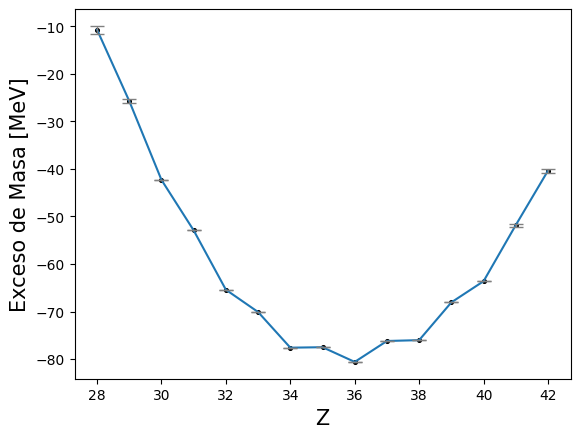

<Figure size 640x480 with 0 Axes>

In [4]:
plt.plot(Z1,E,alpha = 1)
plt.scatter(Z1,E, c = 'black',s = 7)
plt.errorbar(Z1,E,yerr=I,color = 'grey', capthick = 1, capsize = 5, linewidth = 1, linestyle = '')
plt.xlabel("Z", fontsize = 15)
plt.ylabel("Exceso de Masa [MeV]", fontsize = 15)
plt.show()
plt.savefig('1.1.png',bbox_inches='tight')

## Plotting Parabolas of the isobars: odd and even

Separating the values

In [5]:
Ze=[28,30,32,34,36,38,40,42]
Zo=[29,31,33,35,37,39,41]
Ee=[-10.72,-42.314,-65.41,-77.593,-80.591,-76.010,-63.614,-40.37]
Eo=[-25.73,-52.93,-70.10,-77.498,-76.188,-68.064,-51.81]

Defining the parabolas fit

In [6]:
def parabola1(x, a, b, c):
    return a*x**2 + b*x + c
x1 = np.array(Ze)
y1 = np.array(Ee)

def parabola2(x, a, b, c):
    return a*x**2 + b*x + c
x2 = np.array(Zo)
y2 = np.array(Eo)

Fitting parabolas:

In [7]:
popt1, pcov1 = curve_fit(parabola1, x1, y1, p0=[1, 1, 1])
popt2, pcov2 = curve_fit(parabola2, x2, y2, p0=[1, 1, 1])

Plot the parabolas and get the minimums

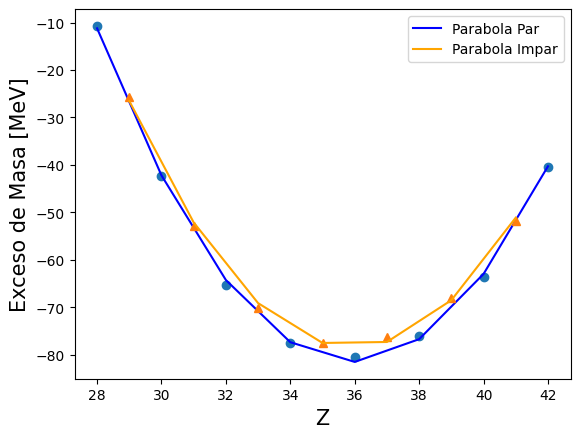

Los mínimos de la parábola par son 35.928253829788645 -81.52968599113706
Los mínimos de la parábola impar son 35.9519099747071 -78.50330730330415


In [10]:
plt.plot(x1, y1, 'o')
plt.plot(x1, parabola1(x1, *popt1), label='Parabola Par', color = 'blue')
plt.legend()

plt.plot(x2, y2, '^')
plt.plot(x2, parabola2(x2, *popt2), label='Parabola Impar', color = 'orange')
plt.legend()

plt.xlabel("Z", fontsize = 15)
plt.ylabel("Exceso de Masa [MeV]", fontsize = 15)
plt.show()

x_min_e = -popt1[1] / (2 * popt1[0])
y_min_e = parabola1(x_min_e, *popt1)

x_min_o = -popt2[1] / (2 * popt2[0])
y_min_o = parabola2(x_min_o, *popt2)

print('Los mínimos de la parábola par son',x_min_e,y_min_e)
print('Los mínimos de la parábola impar son',x_min_o,y_min_o)

## Semiempirical mass value of Z


In [18]:
c = 299792458 #velocidad de la luz en m/s
def semf(Z, A):
    # coeficientes (en MeV)
    a_v = 14.9297 #término de volumen
    a_s = 15.0580 #término de superficie
    a_c = 0.6615 #término de Coulomb
    a_a = 21.6091 #término de asimetría
    a_p = 10.1744 / (A ** (1/2)) #término de paridad
    if A % 2 != 0:
        a_p = 0
    a_n = 12.0 / (A ** (1/2))
    if (A-Z) % 2 != 0:
        a_n = 0

    # calculate the binding energy per nucleon
    B = (a_v * A) - (a_s * A**(2/3)) - (a_c * Z * (Z-1) / A**(1/3)) - (a_a * (A - 2*Z)**2 / A) + a_p*Z**2/A + a_n*(A-Z)**2/A

    return B / A

min_av = ((y_min_e+y_min_o)/2)
BEN = semf(36, 82)
print('Energía de enlace por nucleón con fórmula semiempírica(en MeV):', BEN)

BEN3 = min_av * (c**2)
print ('Energía de enlace por nucleón por ajuste de parábola (en MeV):', BEN3)

Energía de enlace por nucleón con fórmula semiempírica(en MeV): -21.7374
Energía de enlace por nucleón por ajuste de parábola (en MeV): -7.191524074606672e+18
